### Imam Hidayat JCDS-0308
### E-commerce Customer Churn

Churn pelanggan adalah ketika pelanggan berhenti menggunakan produk atau layanan suatu perusahaan. Tingkat churn dihitung dengan membagi jumlah pelanggan yang hilang dalam periode tertentu (misalnya satu kuartal) dengan total jumlah pelanggan awal.

Merupakan platform e-commerce merupakan yang menawarkan berbagai produk kepada klien. Perusahaan ini aktif dalam mengurangi churn pelanggan dan berupaya membangun model prediktif untuk mengidentifikasi pelanggan yang berpotensi churn. Dengan model ini, dapat menerapkan strategi pencegahan seperti kampanye pemasaran yang ditargetkan atau penawaran personalisasi untuk mempertahankan pelanggan dengan efektif.

**Pernyataan Masalah**

Membangun model machine learning untuk mengidentifikasi pelanggan potensial yang akan berpindah, sehingga dapat mencegah kepergian pelanggan dengan strategi pemasaran yang efektif. Penting untuk menghindari kesalahan identifikasi pelanggan yang berpotensi berpindah, untuk memastikan mereka mendapatkan perhatian khusus melalui kampanye pemasaran.

**Eksplorasi Pernyataan Masalah**

- Berapa banyak jumlah pelanggan yang berpindah?
- bagaimana karakteristik dari pelanggan?
- dll.

**Dataset**

| Kolom | Deskripsi |
| --- | --- |
| CustomerID | ID unik pelanggan |
| Churn | Bendera Churn (1 = Churn, 0 = Tidak Churn) |
| Tenure | Durasi atau lama waktu di mana seorang pelanggan telah menjadi bagian dari atau terlibat dengan platform e-commerce atau organisasi |
| WarehouseToHome | Jarak antara gudang dan rumah pelanggan |
| NumberOfDeviceRegistered | Total jumlah perangkat yang terdaftar pada pelanggan tertentu |
| PreferedOrderCat | Kategori pesanan yang disukai oleh pelanggan dalam satu bulan terakhir |
| SatisfactionScore | Skor kepuasan pelanggan terhadap layanan |
| MaritalStatus | Status pernikahan pelanggan |
| NumberOfAddress | Total jumlah alamat yang ditambahkan pada pelanggan tertentu |
| Complain | Apakah ada keluhan yang diajukan dalam satu bulan terakhir |
| DaySinceLastOrder | Hari Sejak pesanan terakhir oleh pelanggan |
| CashbackAmount | Rata-rata cashback dalam satu bulan terakhir |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv', sep=';')

In [3]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [4]:
df.tail()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


In [5]:
df.shape

(3941, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [7]:

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


## Missing Value

In [8]:
df.duplicated().sum()

671

In [9]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

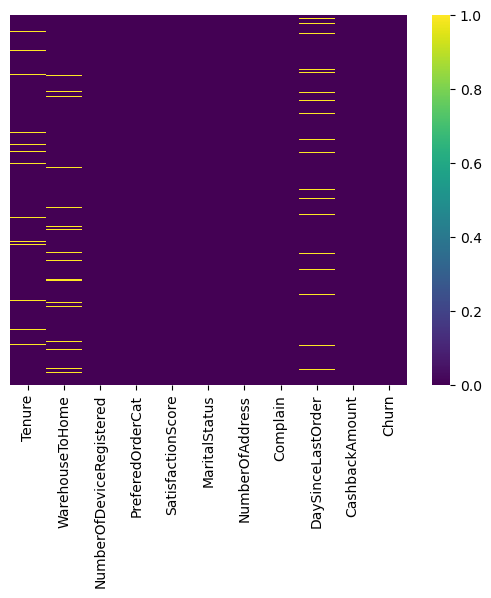

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
plt.show()

In [13]:
df.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [14]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

                   n_miss  ratio
DaySinceLastOrder     181   5.54
Tenure                160   4.89
WarehouseToHome       135   4.13


In [15]:
df["DaySinceLastOrder"].fillna(df["DaySinceLastOrder"].median(), inplace=True)
df["Tenure"].fillna(df["Tenure"].median(), inplace=True)
df["WarehouseToHome"].fillna(df["WarehouseToHome"].median(), inplace=True)

In [16]:
df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

## Exploratory Data Analysis

### Berapa Banyak Yang Melakukan Churn?

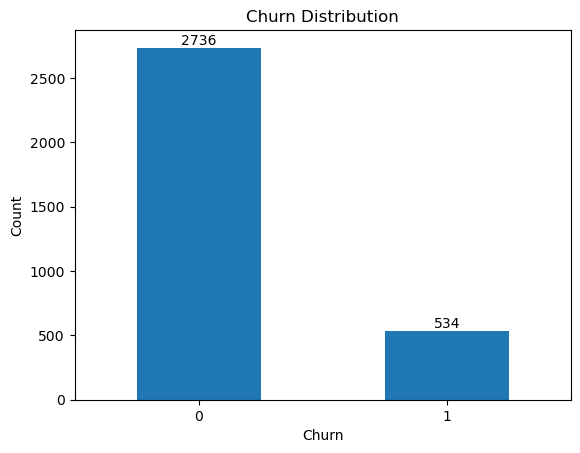

In [17]:
# Check the churn
df['Churn'].value_counts().plot(kind='bar', rot=0)

# Adding annotations to the bars in Subplot 3
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
    xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

# Show the plot
plt.show()

In [18]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
      # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 3270
Variables: 11
cat_cols: 6
num_cols: 5
num_but_cat: 4


In [19]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)

                    PreferedOrderCat      Ratio
PreferedOrderCat                               
Laptop & Accessory              1213  37.094801
Mobile Phone                     725  22.171254
Fashion                          484  14.801223
Mobile                           458  14.006116
Grocery                          241   7.370031
Others                           149   4.556575
               MaritalStatus      Ratio
MaritalStatus                          
Married                 1686  51.559633
Single                  1008  30.825688
Divorced                 576  17.614679
                          NumberOfDeviceRegistered      Ratio
NumberOfDeviceRegistered                                     
4                                             1396  42.691131
3                                              992  30.336391
5                                              493  15.076453
2                                              163   4.984709
1                                           

count    3270.000000
mean       10.132110
std         8.440368
min         0.000000
5%          0.000000
10%         1.000000
20%         1.000000
30%         4.000000
40%         7.000000
50%         9.000000
60%        10.000000
70%        14.000000
80%        18.000000
90%        23.000000
95%        27.000000
99%        31.000000
max        61.000000
Name: Tenure, dtype: float64


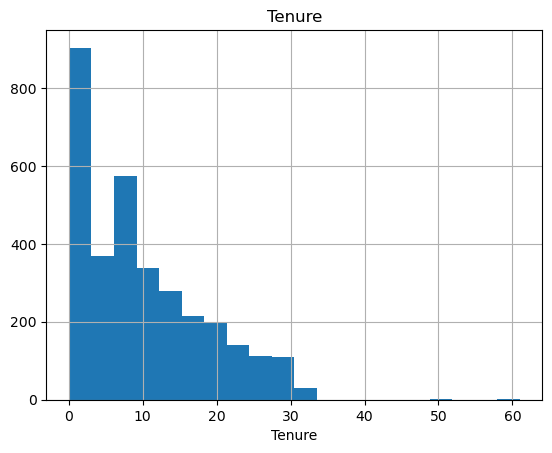

count    3270.000000
mean       15.406728
std         8.404449
min         5.000000
5%          6.000000
10%         7.000000
20%         8.000000
30%         9.000000
40%        11.000000
50%        13.000000
60%        15.000000
70%        17.000000
80%        23.000000
90%        30.000000
95%        32.000000
99%        35.000000
max       127.000000
Name: WarehouseToHome, dtype: float64


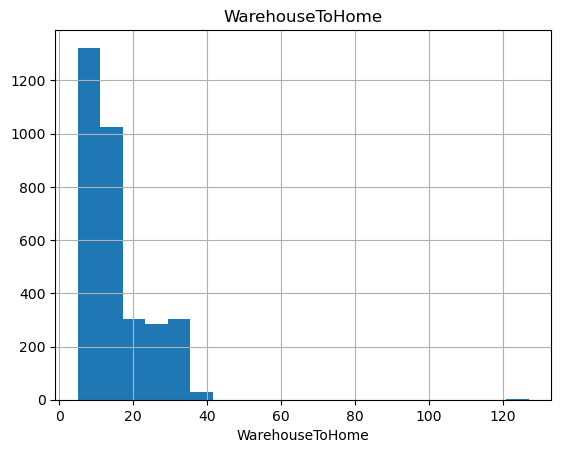

count    3270.000000
mean        4.222936
std         2.623195
min         1.000000
5%          1.000000
10%         2.000000
20%         2.000000
30%         2.000000
40%         3.000000
50%         3.000000
60%         4.000000
70%         5.000000
80%         6.000000
90%         8.000000
95%        10.000000
99%        11.000000
max        22.000000
Name: NumberOfAddress, dtype: float64


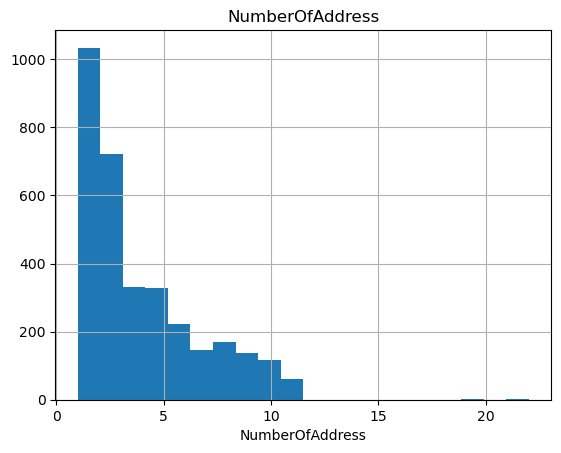

count    3270.000000
mean        4.459939
std         3.609590
min         0.000000
5%          0.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         3.000000
50%         3.000000
60%         4.000000
70%         7.000000
80%         8.000000
90%         9.000000
95%        11.000000
99%        15.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64


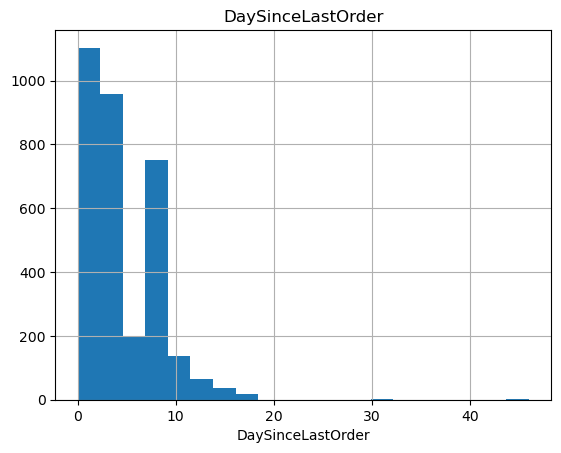

count    3270.000000
mean      177.417670
std        49.310647
min         0.000000
5%        122.759000
10%       126.860000
20%       140.834000
30%       148.378000
40%       153.936000
50%       163.885000
60%       173.806000
70%       188.230000
80%       209.030000
90%       259.963000
95%       291.890000
99%       318.289300
max       324.990000
Name: CashbackAmount, dtype: float64


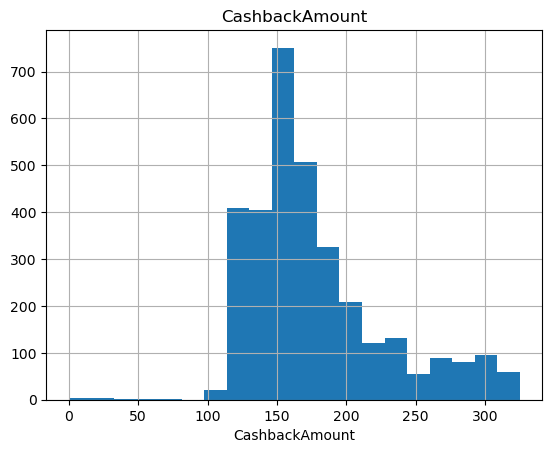

In [20]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


for col in num_cols:
    num_summary(df, col, plot=True)

In [21]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Churn", col)

          Tenure
Churn           
0      11.386330
1       3.705993


       WarehouseToHome
Churn                 
0            15.163377
1            16.653558


       NumberOfAddress
Churn                 
0             4.169225
1             4.498127


       DaySinceLastOrder
Churn                   
0               4.688231
1               3.290262


       CashbackAmount
Churn                
0          180.717007
1          160.513202




In [22]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"Target_Mean": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

PreferedOrderCat
                    Target_Mean  Count      Ratio
PreferedOrderCat                                 
Fashion                0.154959    484  14.801223
Grocery                0.041494    241   7.370031
Laptop & Accessory     0.098104   1213  37.094801
Mobile                 0.270742    458  14.006116
Mobile Phone           0.268966    725  22.171254
Others                 0.073826    149   4.556575


MaritalStatus
               Target_Mean  Count      Ratio
MaritalStatus                               
Divorced          0.154514    576  17.614679
Married           0.109134   1686  51.559633
Single            0.258929   1008  30.825688


NumberOfDeviceRegistered
                          Target_Mean  Count      Ratio
NumberOfDeviceRegistered                               
1                            0.102190    137   4.189602
2                            0.073620    163   4.984709
3                            0.143145    992  30.336391
4                            0.1618

In [23]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


## Corelation

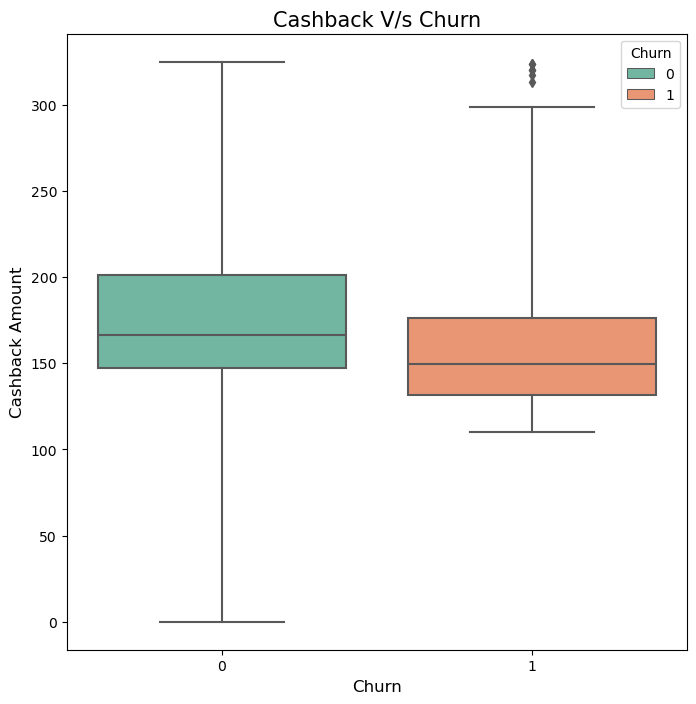

In [24]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'CashbackAmount', data = df, hue = 'Churn', palette="Set2", dodge = False, whis = 3.0)
plt.ylabel('Cashback Amount',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('Cashback V/s Churn',fontsize = 15)
plt.show()

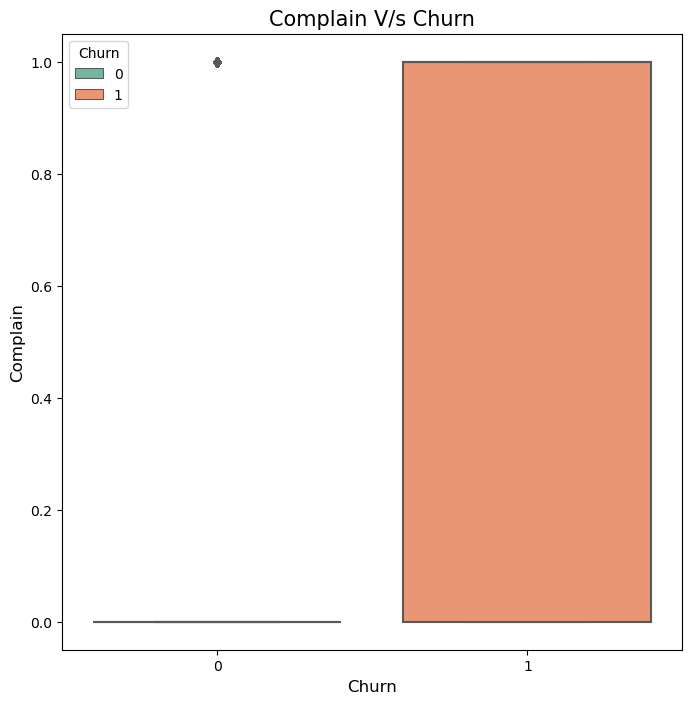

In [25]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'Complain', data = df, hue = 'Churn', palette="Set2", dodge = False, whis = 3.0)
plt.ylabel('Complain',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('Complain V/s Churn',fontsize = 15)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

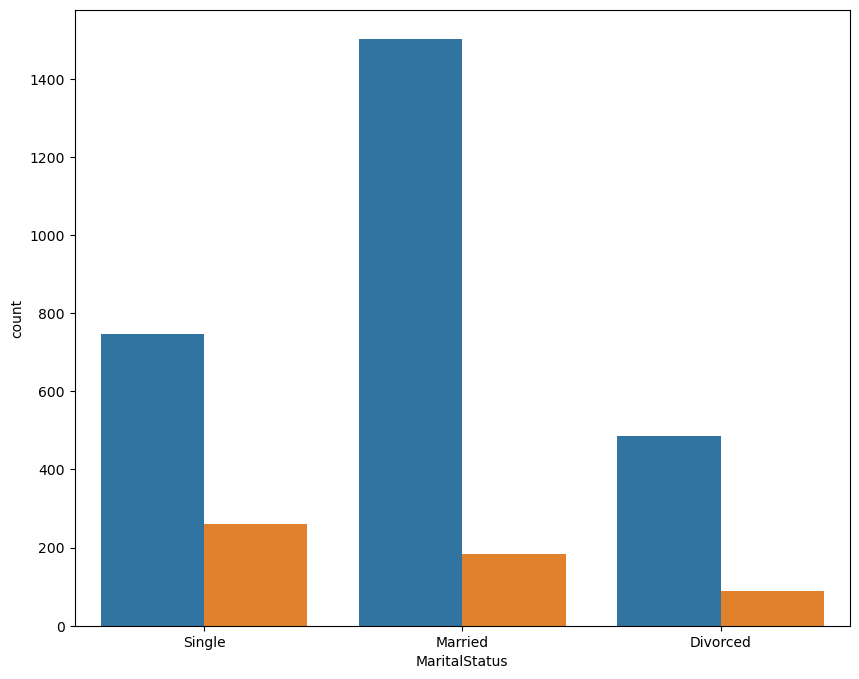

In [26]:
# Define figure size
plt.figure(figsize=(10, 8))

# Create the countplot
ax = sns.countplot(data=df, x=df['MaritalStatus'], hue='Churn')
plt.title('Histogram')

# Adding annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Show the plot
plt.show()


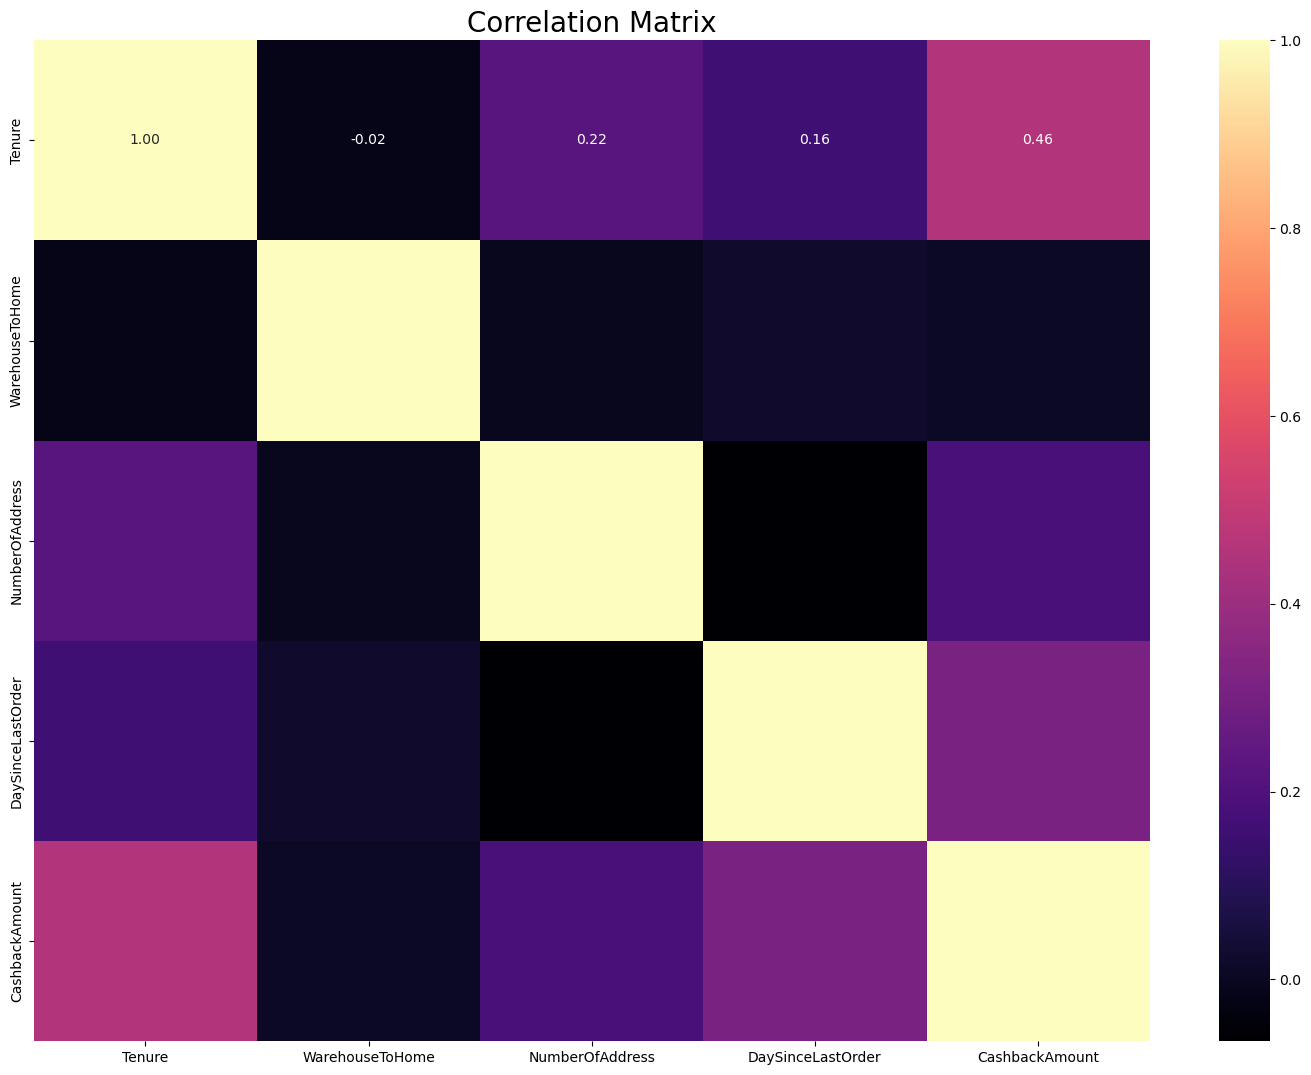

In [ ]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Outliers

In [ ]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

<Axes: >

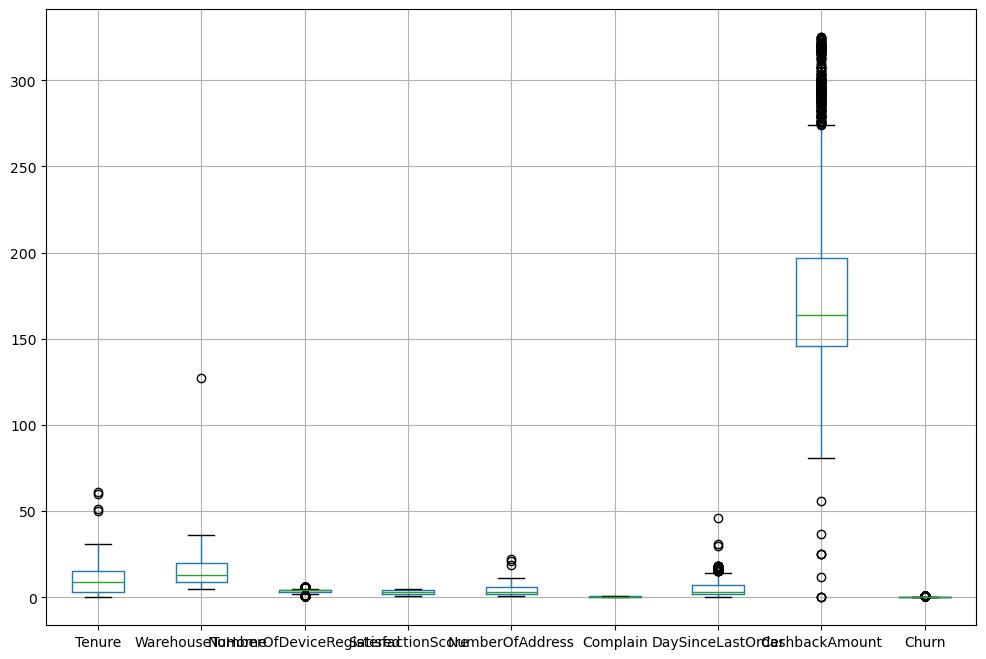

In [ ]:
df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn']].boxplot(figsize=(12,8))

<Axes: >

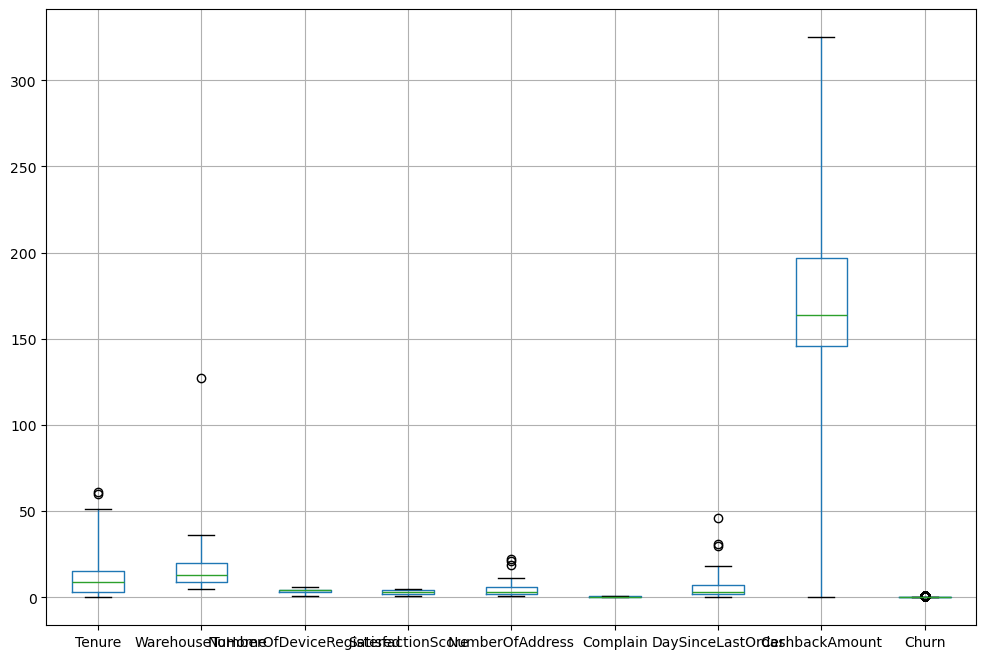

In [ ]:
df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn']].boxplot(figsize=(12,8), whis = 3.0)

## Data Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_copy = df.copy()

In [ ]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [ ]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        labelencoder = LabelEncoder()
        df[feature] = labelencoder.fit_transform(df[feature])



feature: PreferedOrderCat
['Laptop & Accessory', 'Mobile', 'Fashion', 'Others', 'Mobile Phone', 'Grocery']
Categories (6, object): ['Fashion', 'Grocery', 'Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others']
[2 3 0 5 4 1]


feature: MaritalStatus
['Single', 'Married', 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']
[2 1 0]


## Splitting the Data into Train & Test

In [ ]:
X = df.drop('Churn',axis=1) 

y = df['Churn'] 

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 3,stratify = y )

In [ ]:
X_train.shape

(2289, 10)

In [ ]:
X_test.shape

(981, 10)

In [ ]:
y_train.value_counts(normalize = True)

Churn
0    0.83661
1    0.16339
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)

Churn
0    0.836901
1    0.163099
Name: proportion, dtype: float64

## Model Building

1. K-Nearest Neighbours

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [ ]:
y_train_predict_KNN= KNN_model.predict(X_train_norm)
y_test_predict_KNN = KNN_model.predict(X_test_norm) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
KNN_model_score = (KNN_model.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score)
print('\n')
plot_confusion_matrix(KNN_model,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix for KNN Model Training',fontsize = 12)
print(metrics.classification_report(y_train,y_train_predict_KNN))

Accuracy Score for Training Set is :  89.90825688073394




NameError: name 'plot_confusion_matrix' is not defined

Matriks Kinerja pada Kumpulan Data Uji

In [ ]:
KNN_model_score_test = (KNN_model.score(X_test_norm, y_test)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score_test)
print('\n')
plot_confusion_matrix(KNN_model,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for KNN Model',fontsize = 12)
print(metrics.classification_report(y_test,y_test_predict_KNN))

Accuracy Score for Training Set is :  86.64627930682977




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 94.95392412839809
AUC for Test 84.432856272838


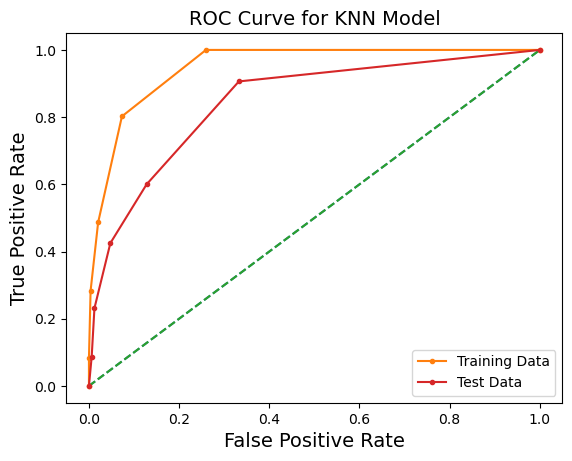

In [ ]:
### Training
probs =  KNN_model.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for KNN Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  KNN_model.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:

rfcl = RandomForestClassifier(random_state = 3)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:

print (pd.DataFrame(rfcl.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

                          Importance
Tenure                     27.423596
CashbackAmount             17.114004
WarehouseToHome            11.153889
NumberOfAddress             8.486763
DaySinceLastOrder           7.629603
Complain                    6.986885
SatisfactionScore           6.554629
NumberOfDeviceRegistered    5.389281
PreferedOrderCat            5.082328
MaritalStatus               4.179022


In [ ]:
ytrain_predict_rfcl = rfcl.predict(X_train)
ytest_predict_rfcl = rfcl.predict(X_test) 

In [ ]:
rfcl_model_score = (rfcl.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for RFCL',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_rfcl))

Accuracy Score for Training Set is :  100.0




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
rfcl_model_score = (rfcl.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for RFCL',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_rfcl))

Accuracy Score for Test Set is :  90.31600407747197




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 100.0
AUC for Test 94.44084957369063


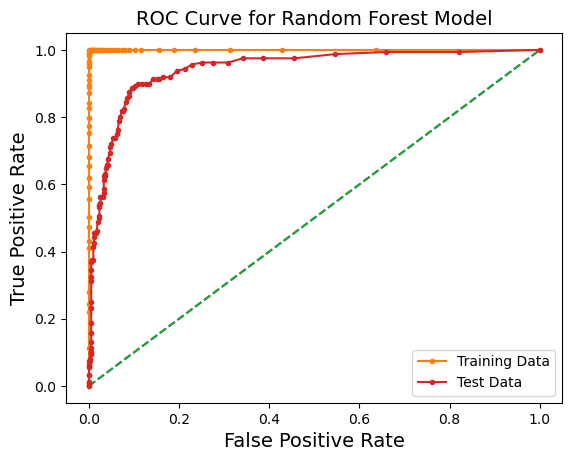

In [ ]:
### Training
probs =  rfcl.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for Random Forest Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  rfcl.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

XG Boost

In [ ]:
import xgboost as xgb

In [ ]:

xgboost = xgb.XGBClassifier(random_state = 3)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [ ]:
ytrain_predict_xgb = xgboost.predict(X_train)
ytest_predict_xgb = xgboost.predict(X_test) 

In [ ]:
xgb_model_score = (xgboost.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgboost,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for XG Boost',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_xgb))

Accuracy Score for Training Set is :  100.0




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
xgb_model_score = (xgboost.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgboost,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for XG Boost',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_xgb))

Accuracy Score for Test Set is :  91.53924566768603




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 100.0
AUC for Test 93.80328867235079


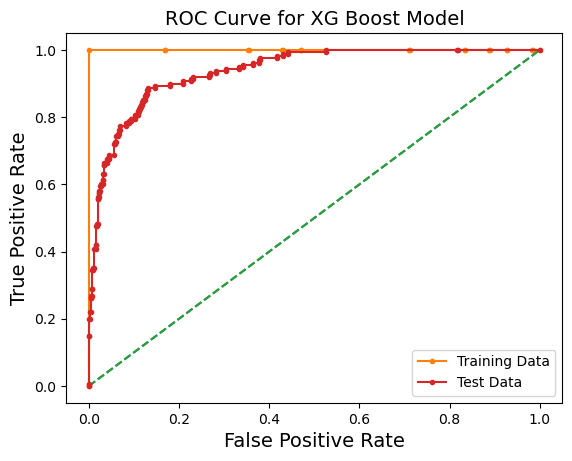

In [ ]:
### Training
probs =  xgboost.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for XG Boost Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  xgboost.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Neural Network (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier #Importing MLP Classifier

In [ ]:

ann_clf = MLPClassifier()
ann_clf.fit(X_train_norm,y_train)

MLPClassifier()

In [ ]:
ytrain_predict_ann = ann_clf.predict(X_train_norm)
ytest_predict_ann = ann_clf.predict(X_test_norm) 

In [ ]:
ann_model_score = (ann_clf.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_clf,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for ANN Model',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_ann))

Accuracy Score for Training Set is :  88.68501529051987




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
ann_model_score = (ann_clf.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_clf,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for ANN Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_ann))

Accuracy Score for Test Set is :  88.88888888888889




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 89.81946635763254
AUC for Test 88.64342265529841


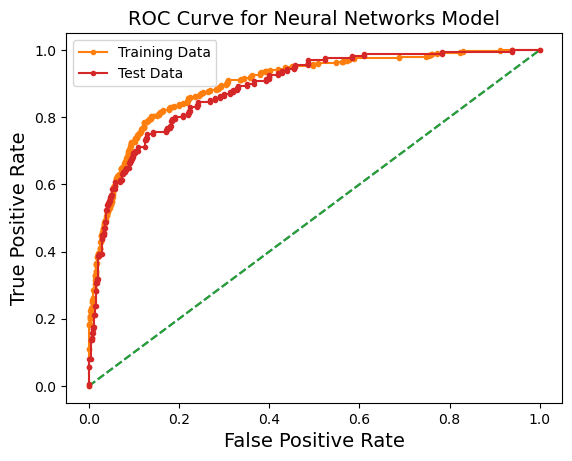

In [ ]:
### Training
probs =  ann_clf.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for Neural Networks Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  ann_clf.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  

In [ ]:

lr = LogisticRegression()
lr.fit(X_train_norm, y_train)

LogisticRegression()

In [ ]:
ytrain_predict_lr = lr.predict(X_train_norm) 
ytest_predict_lr = lr.predict(X_test_norm) 

In [ ]:
lr_model_score = (lr.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for LR Model',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_lr))

Accuracy Score for Training Set is :  87.54914809960681




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
lr_model_score = (lr.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for LR Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_lr))

Accuracy Score for Test Set is :  87.2579001019368




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 85.59556554641794
AUC for Test 86.18453105968331


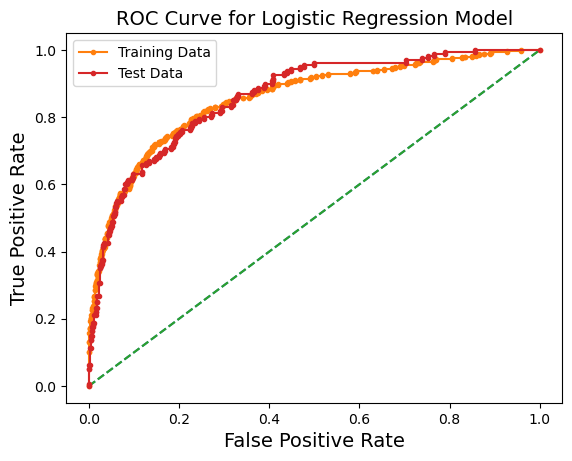

In [ ]:
### Training
probs =  lr.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for Logistic Regression Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  lr.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:

svc = svm.SVC(probability=True,gamma='auto')
svc.fit(X_train,y_train)

SVC(gamma='auto', probability=True)

In [ ]:
ytrain_predict_svc = svc.predict(X_train)
ytest_predict_svc = svc.predict(X_test) 

In [ ]:
svc_model_score = (svc.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',svc_model_score)
print('\n')
plot_confusion_matrix(svc,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix for SVC Train Set',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_svc))

Accuracy Score for Training Set is :  97.90301441677587




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
svc_model_score = (svc.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',svc_model_score)
print('\n')
plot_confusion_matrix(svc,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix for SVC Test Set',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_svc))

Accuracy Score for Test Set is :  86.44240570846075




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 99.92306725681016
AUC for Test 80.99497563946406


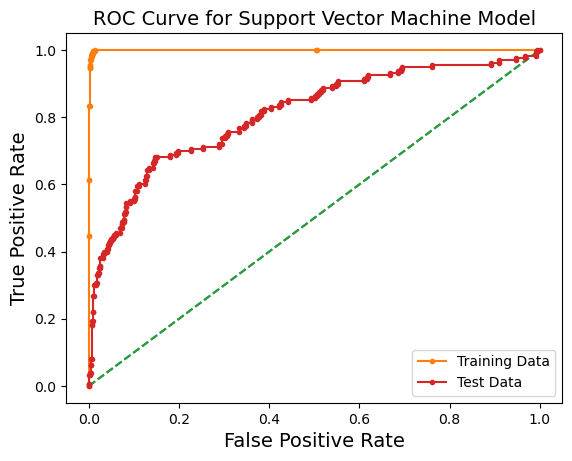

In [ ]:
### Training
probs = svc.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for Support Vector Machine Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  svc.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Building Model (Hyper Tuning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

1. k-Nearest Neighbours - Hypertuned

In [ ]:


grid_knn = {'n_neighbors':[5,10,15,20],
            'weights':['uniform','distance'],
            'leaf_size' : [30,50,70],
            'algorithm' : ['auto'],
            'p' : (1,2),
            'metric' : ['minkowski', 'chebyshev']}

In [ ]:

knn_tuned = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(estimator = knn_tuned, param_distributions = grid_knn, cv= 5, random_state = 3, n_jobs = -1, n_iter = 30)

random_search_knn.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [30, 50, 70],
                                        'metric': ['minkowski', 'chebyshev'],
                                        'n_neighbors': [5, 10, 15, 20],
                                        'p': (1, 2),
                                        'weights': ['uniform', 'distance']},
                   random_state=3)

In [ ]:
print(random_search_knn.best_params_,'\n') 

{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'metric': 'minkowski', 'leaf_size': 70, 'algorithm': 'auto'} 



In [ ]:
knn_tuned = random_search_knn.best_estimator_  
knn_tuned

KNeighborsClassifier(leaf_size=70, p=1)

In [ ]:
ytrain_pred_knn_tuned = knn_tuned.predict(X_train_norm)
ytest_pred_knn_tuned = knn_tuned.predict(X_test_norm) 

In [ ]:
knn_tuned_train_score = (knn_tuned.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',knn_tuned_train_score)
print('\n')
plot_confusion_matrix(knn_tuned,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix for Train Set of KNN Tuned Set',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_pred_knn_tuned))

Accuracy Score for Training Set is :  91.0004368719965




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
knn_tuned_test_score = (knn_tuned.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',knn_tuned_test_score)
print('\n')
plot_confusion_matrix(knn_tuned,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix for Test Set of KNN Tuned Set',fontsize = 12)
print(metrics.classification_report(y_test,ytest_pred_knn_tuned))

Accuracy Score for Test Set is :  86.85015290519877




NameError: name 'plot_confusion_matrix' is not defined

AUC & ROC For KNN Tuned Model

AUC for Training 95.56317281244327
AUC for Test 84.70500913520098


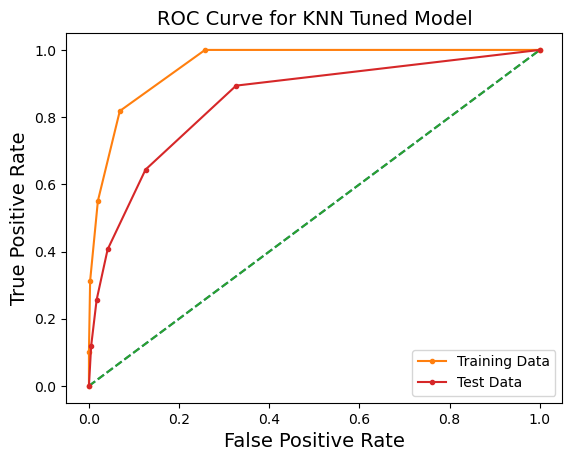

In [ ]:
### Training
probs = knn_tuned.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for KNN Tuned Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  knn_tuned.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

 Random Forest Classifier (Tuned)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:

grid_rfcl = {'max_depth' : [10,15],
             'min_samples_split' : [60,80,100],
             'max_features' : [3,4,5],
             'n_estimators' : [100,200,300]}

In [ ]:
#Building RFCL Model with default parameters
rfcl_tuned = RandomForestClassifier()

#Building Random Search
random_search_rfcl = RandomizedSearchCV(estimator = rfcl_tuned, param_distributions = grid_rfcl, cv= 5, random_state = 3, n_jobs = -1, n_iter = 20 )

#Fitting to Train set
random_search_rfcl.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': [3, 4, 5],
                                        'min_samples_split': [60, 80, 100],
                                        'n_estimators': [100, 200, 300]},
                   random_state=3)

In [ ]:
print(random_search_rfcl.best_params_,'\n') 

{'n_estimators': 100, 'min_samples_split': 60, 'max_features': 4, 'max_depth': 10} 



In [ ]:
rfcl_tuned = random_search_rfcl.best_estimator_
rfcl_tuned

RandomForestClassifier(max_depth=10, max_features=4, min_samples_split=60)

In [ ]:

print (pd.DataFrame(rfcl_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

                          Importance
Tenure                     47.778517
Complain                   12.979775
CashbackAmount             10.901371
NumberOfAddress             5.712038
WarehouseToHome             4.799240
PreferedOrderCat            4.192350
DaySinceLastOrder           4.080904
MaritalStatus               4.049432
NumberOfDeviceRegistered    2.770980
SatisfactionScore           2.735393


In [ ]:
ytrain_predict_rfcl_tuned = rfcl_tuned.predict(X_train) 
ytest_predict_rfcl_tuned = rfcl_tuned.predict(X_test) 

In [ ]:
rfcl_model_score = (rfcl_tuned.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_tuned,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for RFCL Tuned',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_rfcl_tuned))

Accuracy Score for Training Set is :  90.82568807339449




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
rfcl_model_score = (rfcl_tuned.score(X_test, y_test)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_tuned,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for RFCL Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_rfcl_tuned))

Accuracy Score for Training Set is :  88.58307849133537




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 95.11386325239806
AUC for Test 91.59218940316687


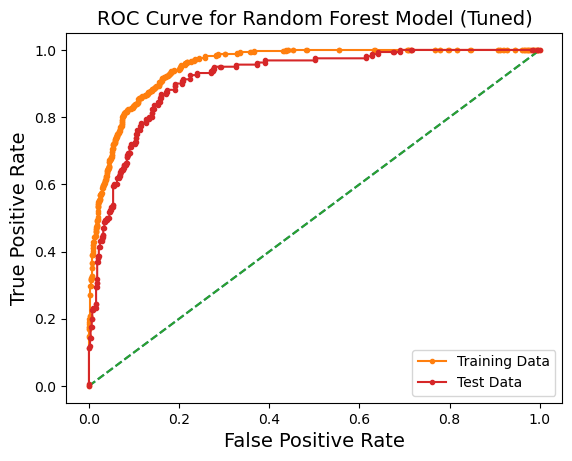

In [ ]:
### Training
probs =  rfcl_tuned.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for Random Forest Model (Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  rfcl_tuned.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

XG Boost (Tuned)

In [ ]:
grid_xgb = {'max_depth' : [5,10],
             'learning_rate' : [0.01,0.001],
             'subsample' : [0.8, 1],
             'n_estimators' : [100,200,300],
             'gamma': [0,1,5],
             'colsample_bytree': [0.3, 0.5, 0.8]}

In [ ]:
#Building XG Boost Model with default parameters
xgb_tuned = xgb.XGBClassifier()

#Building Random Search
random_search_xgb = RandomizedSearchCV(estimator = xgb_tuned, param_distributions = grid_xgb, cv= 5, random_state = 3, n_jobs = 50)

#Fitting to Train set
random_search_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=50,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.8],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.001],
                                        'max_depth': [5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1]},
                   random_state=3)

In [ ]:
print(random_search_xgb.best_params_,'\n')

{'subsample': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8} 



In [ ]:
xgb_tuned = random_search_xgb.best_estimator_ 
xgb_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
ytrain_predict_xgb_tuned = xgb_tuned.predict(X_train)
ytest_predict_xgm_tuned = xgb_tuned.predict(X_test) 

In [ ]:
xgb_model_score = (xgb_tuned.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgb_tuned,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for XG Boost Tuned',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_xgb_tuned))

Accuracy Score for Training Set is :  95.54390563564876




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
xgb_model_score = (xgb_tuned.score(X_test, y_test)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgb_tuned,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for XG Boost Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_xgm_tuned))

Accuracy Score for Training Set is :  89.50050968399592




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 98.92014911827536
AUC for Test 93.67577649208282


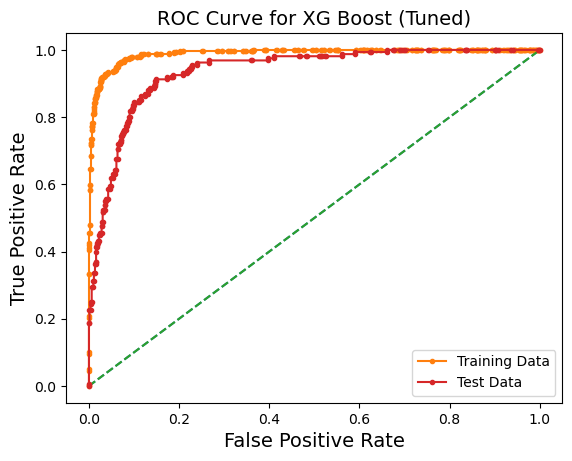

In [ ]:
### Training
probs =  xgb_tuned.predict_proba(X_train)
probs =  probs[:,1]
plt.title('ROC Curve for XG Boost (Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  xgb_tuned.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Neural Network (Tuned)

In [ ]:
grid_ann = {'hidden_layer_sizes' : [300,500],
             'max_iter' : [300,500],
             'solver' : ['adam', 'sgd'],
             'tol' : [0.01,0.001],
             'activation': ['relu','tanh']}

In [ ]:

ann_tuned = MLPClassifier()

random_search_ann = RandomizedSearchCV(estimator = ann_tuned, param_distributions = grid_ann, cv= 5, random_state = 3, n_jobs = -1, n_iter = 15)


random_search_ann.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'hidden_layer_sizes': [300, 500],
                                        'max_iter': [300, 500],
                                        'solver': ['adam', 'sgd'],
                                        'tol': [0.01, 0.001]},
                   random_state=3)

In [ ]:
print(random_search_ann.best_params_,'\n')

{'tol': 0.001, 'solver': 'adam', 'max_iter': 300, 'hidden_layer_sizes': 300, 'activation': 'tanh'} 



In [ ]:
ann_tuned = random_search_ann.best_estimator_
ann_tuned

MLPClassifier(activation='tanh', hidden_layer_sizes=300, max_iter=300,
              tol=0.001)

In [ ]:
ytrain_predict_ann = ann_tuned.predict(X_train_norm)
ytest_predict_ann = ann_tuned.predict(X_test_norm) 

In [ ]:
ann_model_score = (ann_tuned.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_tuned,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for ANN Model (Tuned)',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_ann))

Accuracy Score for Training Set is :  88.07339449541286




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
ann_model_score = (ann_tuned.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_tuned,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for ANN Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_ann))

Accuracy Score for Test Set is :  87.56371049949033




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 86.08843774870499
AUC for Test 86.06577344701584


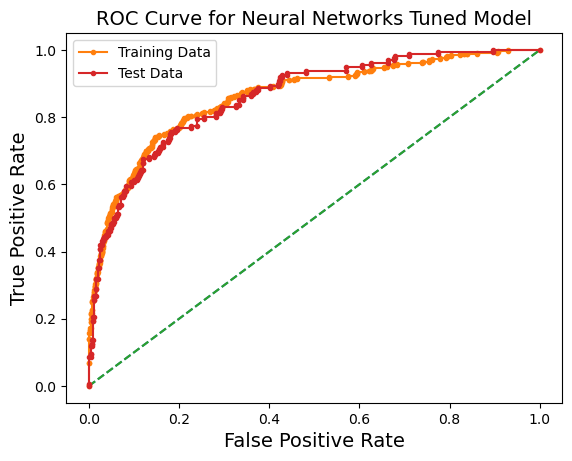

In [ ]:
### Training
probs =  ann_tuned.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for Neural Networks Tuned Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  ann_tuned.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Logistic Regression (Tuned)

In [ ]:
grid_lr = {'tol' : [0.001,0.0001,0.00001],
             'max_iter' : [100,300,500],
             'solver' : ['newton-cg','lbfgs','saga'],
             'penalty' : ['l2','none'],
              'class_weight' : ['balanced', 'none']}

In [ ]:

lr_tuned = LogisticRegression(random_state = 3)


random_search_lr = RandomizedSearchCV(estimator = lr_tuned, param_distributions = grid_lr, cv= 5, n_jobs = -1, n_iter = 40)


random_search_lr.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=3),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', 'none'],
                                        'max_iter': [100, 300, 500],
                                        'penalty': ['l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'saga'],
                                        'tol': [0.001, 0.0001, 1e-05]})

In [ ]:
print(random_search_lr.best_params_,'\n')

{'tol': 0.001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced'} 



In [ ]:
lr_tuned = random_search_lr.best_estimator_ 
lr_tuned

LogisticRegression(class_weight='balanced', random_state=3, solver='newton-cg',
                   tol=0.001)

In [ ]:
ytrain_predict_lr = lr_tuned.predict(X_train_norm)
ytest_predict_lr = lr_tuned.predict(X_test_norm) 

In [ ]:
lr_model_score = (lr_tuned.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_tuned,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for LR Tuned Model',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_lr))

Accuracy Score for Training Set is :  76.67103538663171




NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
lr_model_score = (lr_tuned.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_tuned,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for LR Tuned Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_lr))

Accuracy Score for Test Set is :  76.65647298674821




NameError: name 'plot_confusion_matrix' is not defined

AUC for Training 85.96836123483335
AUC for Test 86.21041412911084


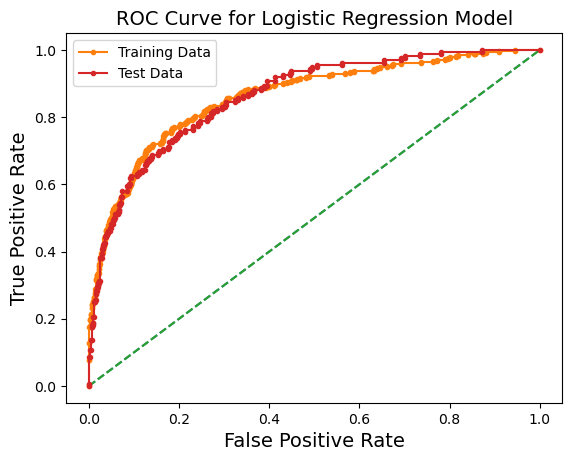

In [ ]:
### Training
probs =  lr_tuned.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for Logistic Regression Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  lr_tuned.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state = 3)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

1. KNN Model with Default Parameters (Balanced)

In [ ]:

norm = MinMaxScaler()

X_train_norm_res = norm.fit_transform(X_train_res)

X_test_norm = norm.transform(X_test)

In [ ]:

KNN_model_balanced = KNeighborsClassifier()

KNN_model_balanced.fit(X_train_norm_res, y_train_res)

Memprediksi kumpulan data Pelatihan dan Pengujian

In [ ]:
y_train_predict_KNN = KNN_model_balanced.predict(X_train_norm_res) 
y_test_predict_KNN  = KNN_model_balanced.predict(X_test_norm) 

Matriks Kinerja pada Kumpulan Data Pelatihan

In [ ]:
KNN_model_score = (KNN_model_balanced.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score)
print('\n')
plot_confusion_matrix(KNN_model_balanced,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix for Train Set of KNN Model (Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,y_train_predict_KNN))

Matriks Kinerja pada Kumpulan Data Uji

In [ ]:
KNN_model_score_test = (KNN_model_balanced.score(X_test_norm, y_test)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score_test)
print('\n')
plot_confusion_matrix(KNN_model_balanced,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for KNN Model',fontsize = 12)
print(metrics.classification_report(y_test,y_test_predict_KNN))

In [ ]:
### Training
probs =  KNN_model_balanced.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for KNN Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  KNN_model_balanced.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Random Forest with Default Parameters (Balanced)

In [ ]:

rfcl_balanced = RandomForestClassifier()

rfcl_balanced.fit(X_train_res, y_train_res)

In [ ]:

print (pd.DataFrame(rfcl_balanced.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

In [ ]:
ytrain_predict_rfcl = rfcl_balanced.predict(X_train_res)
ytest_predict_rfcl = rfcl_balanced.predict(X_test) 

In [ ]:
rfcl_model_score = (rfcl_balanced.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_balanced,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for RFCL (Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_rfcl))

In [ ]:
rfcl_model_score = (rfcl_balanced.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_balanced,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for RFCL',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_rfcl))

In [ ]:
### Training
probs =  rfcl_balanced.predict_proba(X_train_res)
probs = probs[:,1]
plt.title('ROC Curve for Random Forest Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  rfcl_balanced.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

XG Boost with Default Parameters (Balanced)

In [ ]:

xgboost_balanced = xgb.XGBClassifier(random_state = 3)

xgboost_balanced.fit(X_train_res,y_train_res)

In [ ]:
ytrain_predict_xgb = xgboost_balanced.predict(X_train_res) 
ytest_predict_xgb = xgboost_balanced.predict(X_test.values)

In [ ]:
xgb_model_score = (xgboost_balanced.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgboost_balanced,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for XG Boost (Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_xgb))

In [ ]:
xgb_model_score = (xgboost_balanced.score(X_test.values, y_test)*100)
print('Accuracy Score for Test Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgboost_balanced,X_test.values,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for XG Boost (Balanced)',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_xgb))

In [ ]:
### Training
probs =  xgboost_balanced.predict_proba(X_train_res)
probs = probs[:,1]
plt.title('ROC Curve for XG Boost Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  xgboost_balanced.predict_proba(X_test.values)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Neural Network ANN with Default Parameters (Balanced)

In [30]:
from sklearn.neural_network import MLPClassifier 

In [ ]:
ann_clf_balanced = MLPClassifier()

ann_clf_balanced.fit(X_train_norm_res,y_train_res)

In [ ]:
ytrain_predict_ann = ann_clf_balanced.predict(X_train_norm_res) 
ytest_predict_ann = ann_clf_balanced.predict(X_test_norm) 

In [ ]:
ann_model_score = (ann_clf_balanced.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_clf_balanced,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for ANN Model(Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_ann))

In [ ]:
ann_model_score = (ann_clf_balanced.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_clf_balanced,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for ANN Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_ann))

In [ ]:
### Training
probs =  ann_clf_balanced.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for Neural Networks Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  ann_clf_balanced.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Logistic Regression with Default Parameters (Balanced)

In [32]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
lr_balanced = LogisticRegression()


lr_balanced.fit(X_train_norm_res, y_train_res)

In [ ]:
ytrain_predict_lr = lr_balanced.predict(X_train_norm_res) 
ytest_predict_lr = lr_balanced.predict(X_test_norm) 

In [ ]:
lr_model_score = (lr_balanced.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_balanced,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for LR Model (Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_lr))

In [ ]:
lr_model_score = (lr_balanced.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_balanced,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for LR Model (Balanced)',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_lr))

In [ ]:
### Training
probs =  lr_balanced.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for Logistic Regression Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  lr_balanced.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Support Vector (Balanced & Default Parameters)

In [ ]:

svc_balanced = svm.SVC(probability=True,gamma='auto')

svc_balanced.fit(X_train_res,y_train_res)

ytrain_predict_svc = svc_balanced.predict(X_train_res) 

ytest_predict_svc = svc_balanced.predict(X_test) 

In [ ]:
svc_model_score = (svc_balanced.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',svc_model_score)
print('\n')
plot_confusion_matrix(svc_balanced,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix for SVC Train Set',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_svc))

In [ ]:
svc_model_score = (svc_balanced.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',svc_model_score)
print('\n')
plot_confusion_matrix(svc_balanced,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix for SVC Test Set',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_svc))

In [ ]:
### Training
probs = svc_balanced.predict_proba(X_train_res)
probs = probs[:,1]
plt.title('ROC Curve for Support Vector Machine Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  svc_balanced.predict_proba(X_test.values)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

KNN Model (Balanced With Tuning)

In [ ]:
#Defining the parameters into grid

grid_knn = {'n_neighbors':[5,10,15,20],
            'weights':['uniform','distance'],
            'leaf_size' : [30,50,70],
            'algorithm' : ['auto'],
            'p' : (1,2),
            'metric' : ['minkowski', 'chebyshev']}

In [ ]:

knn_tuned_balanced = KNeighborsClassifier()

random_search_knn_bal = RandomizedSearchCV(estimator = knn_tuned_balanced, param_distributions = grid_knn, cv= 5, random_state = 3, n_jobs = -1, n_iter = 30)


random_search_knn_bal.fit(X_train_norm_res,y_train_res)

print(random_search_knn_bal.best_params_,'\n') 

knn_tuned_bal = random_search_knn_bal.best_estimator_ 
knn_tuned_bal

In [ ]:
ytrain_pred_knn_tuned = knn_tuned_bal.predict(X_train_norm_res) 
ytest_pred_knn_tuned = knn_tuned_bal.predict(X_test_norm) 

In [ ]:
knn_tuned_train_score = (knn_tuned_bal.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',knn_tuned_train_score)
print('\n')
plot_confusion_matrix(knn_tuned_bal,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix for Train Set of KNN Tuned Set',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_pred_knn_tuned))

In [ ]:
knn_tuned_test_score = (knn_tuned_bal.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',knn_tuned_test_score)
print('\n')
plot_confusion_matrix(knn_tuned_bal,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix for Test Set of KNN Tuned Set',fontsize = 12)
print(metrics.classification_report(y_test,ytest_pred_knn_tuned))

AUC & ROC For KNN Tuned Model

In [ ]:
### Training
probs = knn_tuned_bal.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for KNN Tuned Model (Balanced with Tuning)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  knn_tuned_bal.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

 Random Forest Classifier (Tuned)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:

grid_rfcl = {'max_depth' : [10,15],
             'min_samples_split' : [60,80,100],
             'max_features' : [3,4,5],
             'n_estimators' : [100,200,300]}

In [ ]:

rfcl_tuned_balanced = RandomForestClassifier()

random_search_rfcl_bal = RandomizedSearchCV(estimator = rfcl_tuned_balanced, param_distributions = grid_rfcl, cv= 5, random_state = 3, n_jobs = -1, n_iter = 20 )


random_search_rfcl_bal.fit(X_train_res,y_train_res)


print(random_search_rfcl_bal.best_params_,'\n') 

rfcl_tuned_bal = random_search_rfcl_bal.best_estimator_  
rfcl_tuned_bal

In [ ]:

print (pd.DataFrame(rfcl_tuned_bal.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

In [ ]:
ytrain_predict_rfcl_tuned_bal =rfcl_tuned_bal.predict(X_train_res)

In [ ]:
ytest_predict_rfcl_tuned_bal = rfcl_tuned_bal.predict(X_test)

In [ ]:
rfcl_model_score = (rfcl_tuned_bal.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_tuned_bal,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for RFCL Balanced & Tuned',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_rfcl_tuned_bal))

In [ ]:
rfcl_model_score = (rfcl_tuned_bal.score(X_test, y_test)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_tuned_bal,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for RFCL Balanced & Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_rfcl_tuned_bal))

In [ ]:
### Training
probs =  rfcl_tuned_bal.predict_proba(X_train_res)
probs = probs[:,1]
plt.title('ROC Curve for Random Forest Model (Balanced & Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  rfcl_tuned_bal.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

XG Boost (Balanced & Tuned)

In [ ]:

grid_xgb = {'max_depth' : [5,10],
             'learning_rate' : [0.01,0.001],
             'subsample' : [0.8, 1],
             'n_estimators' : [100,200,300],
             'gamma': [0,1,5],
             'colsample_bytree': [0.3, 0.5, 0.8]}

In [ ]:

xgb_tuned_balaned = xgb.XGBClassifier()


random_search_xgb_bal = RandomizedSearchCV(estimator = xgb_tuned_balaned, param_distributions = grid_xgb, cv= 5, random_state = 3, n_jobs = 50)


random_search_xgb_bal.fit(X_train_res,y_train_res)

print(random_search_xgb_bal.best_params_,'\n') 

xgb_tuned_bal = random_search_xgb_bal.best_estimator_  
xgb_tuned_bal

In [ ]:
ytrain_predict_xgb_tuned_bal = xgb_tuned_bal.predict(X_train_res)

In [ ]:
ytest_predict_xgm_tuned_bal =xgb_tuned_bal.predict(X_test.values)

In [ ]:
xgb_model_score = (xgb_tuned_bal.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgb_tuned_bal,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for XG Boost Tuned',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_xgb_tuned_bal))

In [ ]:
xgb_model_score = (xgb_tuned_bal.score(X_test.values, y_test)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgb_tuned_bal,X_test.values,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for XG Boost Balaned & Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_xgm_tuned_bal))

In [ ]:
### Training
probs =  xgb_tuned_bal.predict_proba(X_train_res)
probs =  probs[:,1]
plt.title('ROC Curve for XG Boost (Balanced & Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  xgb_tuned_bal.predict_proba(X_test.values)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Neural Network (Balanced & Tuned)

In [ ]:
grid_ann = {'hidden_layer_sizes' : [300,500],
             'max_iter' : [300,500],
             'solver' : ['adam', 'sgd'],
             'tol' : [0.01,0.001],
             'activation': ['relu','tanh']}

In [ ]:

ann = MLPClassifier()

random_search_ann_bal = RandomizedSearchCV(estimator = ann, param_distributions = grid_ann, cv= 5, random_state = 3, n_jobs = -1, n_iter = 15)

random_search_ann_bal.fit(X_train_norm_res,y_train_res)

print(random_search_ann_bal.best_params_,'\n') 

ann_tuned_bal = random_search_ann_bal.best_estimator_  
ann_tuned_bal

In [ ]:
ytrain_predict_ann_bal = ann_tuned_bal.predict(X_train_norm_res) 

In [ ]:
ytest_predict_ann_bal = ann_tuned_bal.predict(X_test_norm) 

In [ ]:
ann_model_score = (ann_tuned_bal.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_tuned_bal,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for ANN Model (Balanced & Tuned)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_ann_bal))

In [ ]:
ann_model_score = (ann_tuned_bal.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_tuned_bal,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for ANN Model (Balanced & Tuned)',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_ann))

In [ ]:
### Training
probs =  ann_tuned_bal.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for Neural Networks (Balanced & Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  ann_tuned_bal.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Logistic Regression (Balanced & Tuned)

In [ ]:
grid_lr = {'tol' : [0.001,0.0001,0.00001],
             'max_iter' : [100,300,500],
             'solver' : ['newton-cg','lbfgs','saga'],
             'penalty' : ['l2','none'],
              'class_weight' : ['balanced', 'none']}

In [ ]:

lr = LogisticRegression(random_state = 3)

random_search_lr_bal = RandomizedSearchCV(estimator = lr, param_distributions = grid_lr, cv= 5, n_jobs = -1, n_iter = 40)

random_search_lr_bal.fit(X_train_norm_res,y_train_res)

print(random_search_lr_bal.best_params_,'\n') 

lr_tuned_bal = random_search_lr_bal.best_estimator_  
lr_tuned_bal

In [ ]:
ytrain_predict_lr_bal = lr_tuned_bal.predict(X_train_norm_res) 

In [ ]:
ytest_predict_lr_bal = lr_tuned_bal.predict(X_test_norm)

In [ ]:
lr_model_score = (lr_tuned_bal.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_tuned_bal,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for LR Balanced & Tuned',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_lr_bal))

In [ ]:
lr_model_score = (lr_tuned_bal.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_tuned_bal,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for LR Balanced & Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_lr))

In [ ]:
### Training
probs =  lr_tuned_bal.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for LR Balanced & Tuned',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  lr_tuned_bal.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

In [ ]:
#AUC Score & ROC Curve

fig = plt.figure(figsize=(15,10))

#1 KNN With SMOTE & Hypertuning

probs_knn =  knn_tuned_bal.predict_proba(X_test_norm)
probs_knn = probs_knn[:,1]

fpr,tpr,thres = roc_curve(y_test, probs_knn)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'KNN with SMOTE & Hypertuning')
plt.legend(loc = 'best')


#2 Random Forest Classifier with SMOTE & Default Parameters
probs_rfcl =  rfcl_balanced.predict_proba(X_test)
probs_rfcl = probs_rfcl[:,1]

fpr,tpr,thres = roc_curve(y_test, probs_rfcl)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'RFCL with SMOTE & Default')
plt.legend(loc = 'best')

#3 KNN With SMOTE & Default Parameters

probs_knn_SMOTE =  KNN_model_balanced.predict_proba(X_test_norm)
probs_knn_SMOTE = probs_knn_SMOTE[:,1]

fpr,tpr,thres = roc_curve(y_test, probs_knn_SMOTE)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'KNN with SMOTE & Default Parameters')
plt.legend(loc = 'best')


#4 XG Boost with SMOTE & Hypertuning

probs_xgb =  xgb_tuned_bal.predict_proba(X_test.values)
probs_xgb = probs_xgb[:,1]

fpr,tpr,thres = roc_curve(y_test, probs_xgb)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'XG Boost with SMOTE & Hypertuning')
plt.legend(loc = 'best')

#5 Random Forest With SMOTE & Hypertuning

probs_rfcl_smote =  rfcl_tuned_bal.predict_proba(X_test)
probs_rfcl_smote = probs_rfcl_smote[:,1]


fpr,tpr,thres = roc_curve(y_test, probs_rfcl_smote)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'RFCL with SMOTE & Hypertuning')
plt.legend(loc = 'best')

plt.show()